### 📌 **(ETL fase 01) - Extração Dados:**

In [1]:
import pandas as pd
import json

url = r'data\dadosAPI\TelecomX_Data.json'
df = pd.read_json(url)

In [2]:
df.head(3)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### 🔧 **(ETL fase 02) - Análise do Dataframe original + normalização:**

O dataframe provém de um <strong>arquivo.json</strong>, por isso a seguir, farei uso do método normalize de maneira
a deixar o documento mais adequado para manipulação.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
df.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [5]:
colunas_df = list(df.columns)
colunas_df

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [6]:
pd.json_normalize(df['customer']).head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9


In [7]:
pd.json_normalize(df['phone']).head(2)

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes


In [8]:
pd.json_normalize(df['internet']).head(2)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes


In [9]:
pd.json_normalize(df['account']).head(2)

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4


In [10]:
# Juntando subdataframes ao df original:
# exclui todas as colunas com objetos literais JS, e
# concatenei os dfs normalizados acima:

df = pd.concat([
    df.drop(columns=['customer','phone','internet','account']),
    pd.json_normalize(df['customer'], sep='_'),
    pd.json_normalize(df['phone'], sep='_'),
    pd.json_normalize(df['internet'], sep='_'),
    pd.json_normalize(df['account'], sep='_')
    ],
    axis=1)

In [11]:
df.head(3)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [12]:
df.set_index('customerID', inplace=True)

In [13]:
df.head(3)

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [14]:
# Analizando novas colunas existentes:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7267 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null 

In [15]:
df.dtypes

Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges_Monthly     float64
Charges_Total        object
dtype: object

In [16]:
colunas_df = list(df.columns)
colunas_df

['Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges_Monthly',
 'Charges_Total']

### 🔧 **(ETL fase 03) - Verificando Inconsistências nos Dados:**

In [17]:
def getValoresCelulas(df, nmColOrigem):
    vlsExistentes = {
        'nm_coluna': nmColOrigem,
        'valores_vistos': \
        list(pd.unique(df[nmColOrigem]))
    }
    return vlsExistentes

In [18]:
getValoresCelulas(df, 'Churn') # Valores preenchidos na coluna "Evasão/Churn".

{'nm_coluna': 'Churn', 'valores_vistos': ['No', 'Yes', '']}

In [19]:
for nmColuna in df.columns:
    print(getValoresCelulas(df, nmColuna))

{'nm_coluna': 'Churn', 'valores_vistos': ['No', 'Yes', '']}
{'nm_coluna': 'gender', 'valores_vistos': ['Female', 'Male']}
{'nm_coluna': 'SeniorCitizen', 'valores_vistos': [0, 1]}
{'nm_coluna': 'Partner', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'Dependents', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'tenure', 'valores_vistos': [9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34, 1, 45, 50, 23, 55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27, 2, 25, 29, 14, 35, 64, 39, 40, 6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44, 22, 24, 19, 47, 62, 46, 52, 8, 60, 48, 28, 41, 53, 68, 51, 31, 36, 17, 18, 38, 42, 0]}
{'nm_coluna': 'PhoneService', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'MultipleLines', 'valores_vistos': ['No', 'Yes', 'No phone service']}
{'nm_coluna': 'InternetService', 'valores_vistos': ['DSL', 'Fiber optic', 'No']}
{'nm_coluna': 'OnlineSecurity', 'valores_vistos': ['No', 'Yes', 'No internet service']}
{'nm_coluna': 'OnlineBackup', 'valores_vistos': ['Yes', 'No'

In [20]:
df['Charges_Monthly'].isna()

customerID
0002-ORFBO    False
0003-MKNFE    False
0004-TLHLJ    False
0011-IGKFF    False
0013-EXCHZ    False
              ...  
9987-LUTYD    False
9992-RRAMN    False
9992-UJOEL    False
9993-LHIEB    False
9995-HOTOH    False
Name: Charges_Monthly, Length: 7267, dtype: bool

In [21]:
df.columns.str.lower()

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total'],
      dtype='object')

In [22]:
df.columns.str.lower().str.replace(' ','_')

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total'],
      dtype='object')

In [23]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [24]:
df.head(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [25]:
df.churn.unique()

array(['No', 'Yes', ''], dtype=object)

In [26]:
df['churn'].unique()

array(['No', 'Yes', ''], dtype=object)

### 🔧 **(ETL fase 04) - Tratando as Inconsistências nos Dados:**

Primeiro antes de criar a coluna "Contas Diárias" pedida no Challenge, excluirei alguns valores inválidos dentro do dataframe.
- Antes de converter valores aos tipos *np.float64*, *string*, *etc*; irei verificar valores inadequados, como strings vazias ou NaN.
- Feito isso, faço a conversão dos tipos.

In [27]:
# Testes iniciais:

a = df['churn'].isin(['Yes']).sum()
b = df['churn'].isin(['No']).sum()
(a + b) == len(df['churn'])

False

In [28]:
a + b

7043

In [29]:
selecao_churn1 = df['churn'] == 'Yes'
selecao_churn2 = df['churn'] == 'No'
len(df[selecao_churn1]) + \
len(df[selecao_churn2]) 

7043

In [30]:
c = df['churn'].isin(['Yes','No']).sum()
c

7043

In [31]:
c < len(df)

True

In [32]:
df['churn'].value_counts(dropna=False)

churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

In [33]:
# Série booleana com indices do DF que estão adequados
# ao padrão "Yes"/"No":
df['churn'].isin(['Yes','No'])

customerID
0002-ORFBO    True
0003-MKNFE    True
0004-TLHLJ    True
0011-IGKFF    True
0013-EXCHZ    True
              ... 
9987-LUTYD    True
9992-RRAMN    True
9992-UJOEL    True
9993-LHIEB    True
9995-HOTOH    True
Name: churn, Length: 7267, dtype: bool

In [34]:
# Indices os quais RESPEITAM o padrão acima:
df[df['churn'].isin(['Yes','No'])].head(3) 

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85


In [35]:
# Indices os quais NÃO respeitam:
df[~df['churn'].isin(['Yes','No'])].head(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
customerID,,,,,,,,,,,,,,,,,,,,
0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
0120-YZLQA,,Male,0,No,No,71,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,Yes,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2


In [36]:
len(df[~df['churn'].isin(['Yes','No'])]) # Número deles

224

In [37]:
df = df[df['churn'].isin(['Yes','No'])] # Retirando todos os índices indesejados do Dataframe

In [38]:
df['churn'].value_counts()

churn
No     5174
Yes    1869
Name: count, dtype: int64

In [39]:
df['churn'] = df['churn'].astype(str)

In [40]:
df = df[~df['charges_total'].isin(['',' '])] # Removendo valores vazios dos registros de cobrança.

In [41]:
import numpy as np

copia_coluna = df['charges_total'].astype(np.float64)
df.drop(columns='charges_total')
df['charges_total'] = copia_coluna

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null 

In [43]:
df.charges_total.head(3)

customerID
0002-ORFBO    593.30
0003-MKNFE    542.40
0004-TLHLJ    280.85
Name: charges_total, dtype: float64

In [44]:
df['charges_total'].head(3)

customerID
0002-ORFBO    593.30
0003-MKNFE    542.40
0004-TLHLJ    280.85
Name: charges_total, dtype: float64

In [45]:
df.charges_total.sum()

16056168.7

In [46]:
df.charges_monthly.sum()

455661.0

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7032 non-null   object 
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   object 
 4   dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   object 
 7   multiplelines     7032 non-null   object 
 8   internetservice   7032 non-null   object 
 9   onlinesecurity    7032 non-null   object 
 10  onlinebackup      7032 non-null   object 
 11  deviceprotection  7032 non-null   object 
 12  techsupport       7032 non-null   object 
 13  streamingtv       7032 non-null   object 
 14  streamingmovies   7032 non-null   object 
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null 

In [48]:
contas_diarias_calc = (df['charges_monthly']/30)
contas_diarias_calc

customerID
0002-ORFBO    2.186667
0003-MKNFE    1.996667
0004-TLHLJ    2.463333
0011-IGKFF    3.266667
0013-EXCHZ    2.796667
                ...   
9987-LUTYD    1.838333
9992-RRAMN    2.836667
9992-UJOEL    1.676667
9993-LHIEB    2.261667
9995-HOTOH    1.966667
Name: charges_monthly, Length: 7032, dtype: float64

In [49]:
df['contas_diarias'] = contas_diarias_calc
df.loc[:,'contas_diarias'] = df['contas_diarias'].astype(np.float64)  

In [50]:
df.columns

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total', 'contas_diarias'],
      dtype='object')

In [51]:
df.head(1)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,contas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.186667


### 🔧 **(ETL fase 04B) - Padronização e Transformação de Dados (Opcional):**

In [52]:
for nmColuna in df.columns:
    print(getValoresCelulas(df, nmColuna))

{'nm_coluna': 'churn', 'valores_vistos': ['No', 'Yes']}
{'nm_coluna': 'gender', 'valores_vistos': ['Female', 'Male']}
{'nm_coluna': 'seniorcitizen', 'valores_vistos': [0, 1]}
{'nm_coluna': 'partner', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'dependents', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'tenure', 'valores_vistos': [9, 4, 13, 3, 71, 63, 7, 65, 54, 72, 5, 56, 34, 1, 45, 50, 23, 55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27, 2, 25, 29, 14, 35, 64, 39, 40, 11, 6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44, 22, 24, 19, 47, 62, 46, 52, 8, 60, 48, 28, 41, 53, 68, 31, 36, 17, 18, 51, 38, 42]}
{'nm_coluna': 'phoneservice', 'valores_vistos': ['Yes', 'No']}
{'nm_coluna': 'multiplelines', 'valores_vistos': ['No', 'Yes', 'No phone service']}
{'nm_coluna': 'internetservice', 'valores_vistos': ['DSL', 'Fiber optic', 'No']}
{'nm_coluna': 'onlinesecurity', 'valores_vistos': ['No', 'Yes', 'No internet service']}
{'nm_coluna': 'onlinebackup', 'valores_vistos': ['Yes', 'No', 'No i

In [53]:
df_info_binarias = df.copy(deep=True)

In [54]:
# ----------------------------------------------------------------------
# AVISO: Não vou refatorar com funções para decorar melhor o comando:
# ----------------------------------------------------------------------

copia1 = df['churn'].map({'Yes': 1,'No': 0}).astype(np.int64)
df_info_binarias.drop(columns='churn')
df_info_binarias['churn'] = copia1

copia2 = df['partner'].map({'Yes': 1,'No': 0}).astype(np.int64)
df_info_binarias.drop(columns='partner')
df_info_binarias['partner'] = copia2

copia3 = df['dependents'].map({'Yes': 1,'No': 0}).astype(np.int64)
df_info_binarias.drop(columns='dependents')
df_info_binarias['dependents'] = copia3

# ----------------------------------------------------------------------
# AVISO 02: Essa segunda leva vou refatorar:
# ----------------------------------------------------------------------

def remodelarColuna(nmColuna, dicionario):
    copia = df[nmColuna].map(dicionario).astype(np.int64)
    df_info_binarias.drop(columns=nmColuna)
    df_info_binarias[nmColuna] = copia

dict_opcoes = { 
    'Yes': 1,
    'DSL': 1,
    'Fiber optic': 1, 
    'No': 0, 
    'No phone service': 0,
    'No internet service': 0 
}

remodelarColuna('phoneservice', dict_opcoes)
remodelarColuna('multiplelines', dict_opcoes)
remodelarColuna('internetservice', dict_opcoes)
remodelarColuna('onlinesecurity', dict_opcoes)
remodelarColuna('onlinebackup', dict_opcoes)
remodelarColuna('deviceprotection', dict_opcoes)
remodelarColuna('techsupport', dict_opcoes)
remodelarColuna('streamingtv', dict_opcoes)
remodelarColuna('streamingmovies', dict_opcoes)
remodelarColuna('paperlessbilling', dict_opcoes)

In [55]:
df_info_binarias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   churn             7032 non-null   int64  
 1   gender            7032 non-null   object 
 2   seniorcitizen     7032 non-null   int64  
 3   partner           7032 non-null   int64  
 4   dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   phoneservice      7032 non-null   int64  
 7   multiplelines     7032 non-null   int64  
 8   internetservice   7032 non-null   int64  
 9   onlinesecurity    7032 non-null   int64  
 10  onlinebackup      7032 non-null   int64  
 11  deviceprotection  7032 non-null   int64  
 12  techsupport       7032 non-null   int64  
 13  streamingtv       7032 non-null   int64  
 14  streamingmovies   7032 non-null   int64  
 15  contract          7032 non-null   object 
 16  paperlessbilling  7032 non-null 

In [56]:
df_info_binarias.head(3)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,contas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,Female,0,1,1,9,1,0,1,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
0003-MKNFE,0,Male,0,0,0,9,1,1,1,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
0004-TLHLJ,1,Male,0,0,0,4,1,0,1,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333


### **📊 (ETL fase 05) - Carga e Análise (L - Load & Analysis)**

In [57]:
df.describe()

,seniorcitizen,tenure,charges_monthly,charges_total,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


In [58]:
df_info_binarias.describe()

,churn,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,charges_monthly,charges_total,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.783845,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.411650,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [59]:
df[['charges_monthly','charges_total','contas_diarias']].describe()

,charges_monthly,charges_total,contas_diarias
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,2.159940
std,30.085974,2266.771362,1.002866
min,18.250000,18.800000,0.608333
25%,35.587500,401.450000,1.186250
50%,70.350000,1397.475000,2.345000
75%,89.862500,3794.737500,2.995417
max,118.750000,8684.800000,3.958333


In [60]:
df_info_binarias[['charges_monthly','charges_total','contas_diarias']].describe()

,charges_monthly,charges_total,contas_diarias
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,2.159940
std,30.085974,2266.771362,1.002866
min,18.250000,18.800000,0.608333
25%,35.587500,401.450000,1.186250
50%,70.350000,1397.475000,2.345000
75%,89.862500,3794.737500,2.995417
max,118.750000,8684.800000,3.958333


In [61]:
df.columns

Index(['churn', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'charges_monthly', 'charges_total', 'contas_diarias'],
      dtype='object')

In [62]:
# df[['']] # ... pergar o desvio padrão de month to manth, two years, one year

In [63]:
df.query('contract=="Month-to-month"').head(1)

,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,contas_diarias
customerID,,,,,,,,,,,,,,,,,,,,,
0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,1.996667


In [64]:
contratos_pagamento_mensal =\
    df.query('contract=="Month-to-month"')['charges_monthly'].describe()
pd.DataFrame(contratos_pagamento_mensal)

,charges_monthly
count,3875.000000
mean,66.398490
std,26.926599
min,18.750000
25%,45.850000
50%,73.250000
75%,88.875000
max,117.450000


In [65]:
mediana = contratos_pagamento_mensal.median(numeric_only=True)
round(mediana,3)

69.824

In [66]:
contratos_pagamento_bienal =\
df.query('contract=="Two year"')['charges_monthly'].describe()
contratos_pagamento_bienal

count    1685.000000
mean       60.872374
std        34.712210
min        18.400000
25%        24.050000
50%        64.450000
75%        90.550000
max       118.750000
Name: charges_monthly, dtype: float64

In [67]:
mediana = contratos_pagamento_bienal.median(numeric_only=True)
round(mediana,3)

62.661

In [68]:
contratos_pagamento_anual = \
df.query('contract=="One year"')['charges_monthly'].describe()
contratos_pagamento_anual

count    1472.000000
mean       65.079416
std        31.829391
min        18.250000
25%        28.812500
50%        68.750000
75%        94.812500
max       118.600000
Name: charges_monthly, dtype: float64

In [69]:
mediana = contratos_pagamento_anual.median(numeric_only=True)
round(mediana,3)

66.915

### **📊 (ETL fase 06) - Distribuição da Evasão**

Neste passo, o objetivo é entender como a variável "**churn**" (*evasão*) está distribuída entre os clientes. Utilize gráficos para visualizar a proporção de clientes que permaneceram e os que saíram.

##### 💡**Ideia: Vou agrupar Evasões (Churns) por categorias:**

Quero tentar entender melhor os grupos os quais tem o maior número de evasões.
- Evasões por tipo de contrato.

In [70]:
df_info_binarias[['contract','churn']]

,contract,churn
customerID,,
0002-ORFBO,One year,0
0003-MKNFE,Month-to-month,0
0004-TLHLJ,Month-to-month,1
0011-IGKFF,Month-to-month,1
0013-EXCHZ,Month-to-month,1
...,...,...
9987-LUTYD,One year,0
9992-RRAMN,Month-to-month,1
9992-UJOEL,Month-to-month,0


In [71]:
evasoes_por_contrato = df_info_binarias\
    .groupby('contract')['churn']\
    .sum().sort_values()

In [72]:
df_evasoes = pd.DataFrame(evasoes_por_contrato)
df_evasoes

,churn
contract,
Two year,48
One year,166
Month-to-month,1655


In [76]:
# ------------------------------------------
# Porcentagem de clientes os quais evadiram:
# ------------------------------------------

import matplotlib.pyplot as plt

clintes_que_evadiram = df['churn'] == 'Yes'

porcentg_planos_cancelados = \
    len(df[clintes_que_evadiram])/len(df)

porcentg_planos_ativos = \
    1 - porcentg_planos_cancelados

In [77]:
def showPorcentagemGrupo(
    totalAmostra,
    qtdGrupo,
    legendasGraph):

    porcentagens = [totalAmostra,qtdGrupo]
    fig, ax = plt.subplots()
    ax.pie(
        porcentagens,
        labels=legendasGraph,
        autopct='%1.1f%%')
    plt.show()

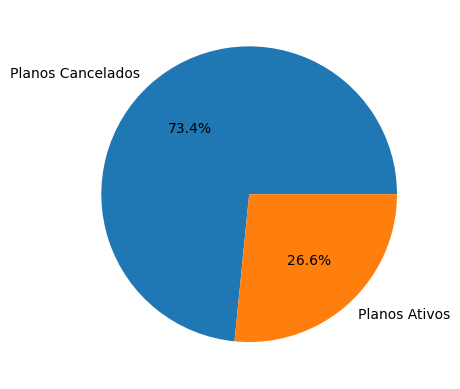

In [78]:
showPorcentagemGrupo(
    porcentg_planos_ativos,
    porcentg_planos_cancelados,
    ['Planos Cancelados','Planos Ativos'])

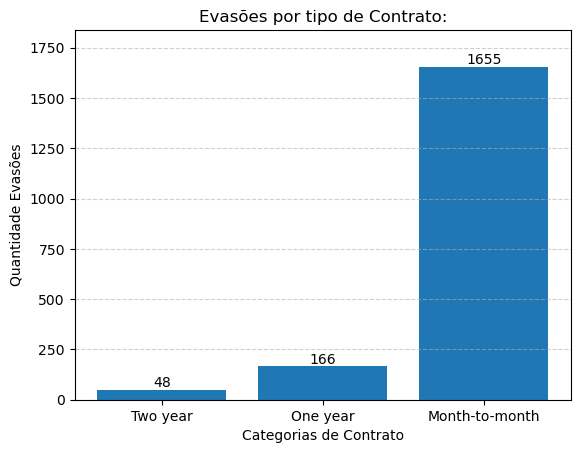

In [80]:
# -------------------------------------------
# Quantidade de evasões por tipo de contrato:
# -------------------------------------------

import matplotlib.pyplot as plt

categorias_grafico = list(df_evasoes.index)
valores = [vl for vl in df_evasoes['churn']]

plt.bar(categorias_grafico, valores)

plt.title('Evasões por tipo de Contrato:')
plt.xlabel('Categorias de Contrato')
plt.ylabel('Quantidade Evasões')
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, vlr in enumerate(valores):
    plt.text(
        i,
        vlr, 
        f'{vlr}',
        ha='center',
        va='bottom')

plt.ylim(0, max(valores) * 1.11)
plt.show()

 ##### **Seguindo roteiro Challenge: Contagem de Evasão por Variáveis Categóricas:**

Agora, vamos explorar como a evasão se distribui de acordo com variáveis categóricas, como gênero, tipo de contrato, método de pagamento, entre outras.

Essa análise pode revelar padrões interessantes, como, por exemplo, se clientes de determinados perfis têm maior tendência a cancelar o serviço, o que ajudará a direcionar ações estratégicas.

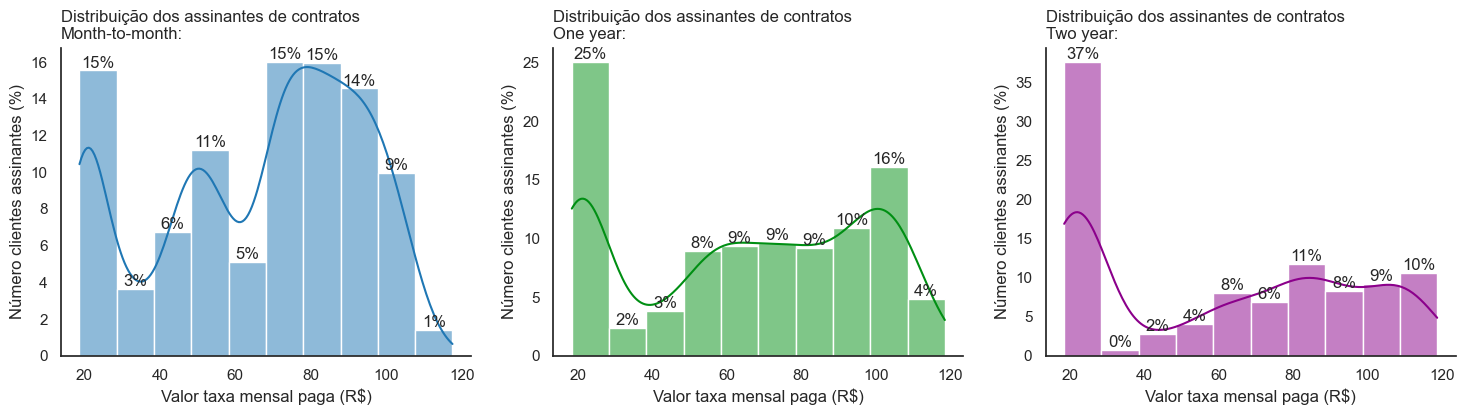

In [129]:
# OBJETIVO GRÁFICO:
# Avaliando a distribuição de taxas
# mensais pagas por clientes
# de diferentes tipos de contrato (Mensal,Anual,Bienal).

import seaborn as sns
import math

def obterDadosContratos(tipoContrato = str):
    clients_pagamento_periodo_x = df['contract'] == tipoContrato
    valores_pagos = df[clients_pagamento_periodo_x]['charges_monthly']
    return valores_pagos

valores_pagos = obterDadosContratos('Month-to-month')
valores_pagos2 = obterDadosContratos('One year')
valores_pagos3 = obterDadosContratos('Two year')

# Construção do Histograma:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,4))
sns.set_theme(style='white')

NUM_CLASSES = 10

def assembleHistogram(
        data,kde,ax,bins,element,stat,color):
    return sns.histplot(
        data=data,
        kde=kde,
        ax=ax,
        bins=bins,
        element=element,
        stat=stat,
        color=color)

hist_plot = assembleHistogram(
    valores_pagos, True, ax1, NUM_CLASSES, 'bars', 'percent', "tab:blue")
hist_plot2 = assembleHistogram(
    valores_pagos2, True, ax2, NUM_CLASSES, 'bars', 'percent', "#008F13")
hist_plot3 = assembleHistogram(
    valores_pagos3, True, ax3, NUM_CLASSES, 'bars', 'percent', "darkmagenta")

def roundLabel(numFloat):
    return math.floor(numFloat)

def addLabelOnBars(histograma, subplot):
    for vls_barras in histograma.containers:
        subplot.bar_label(
            vls_barras, 
            labels=[ 
                f'{roundLabel(vl_individual.get_height())}%' 
                for vl_individual in vls_barras ]
            )
        
addLabelOnBars(hist_plot, ax1)
addLabelOnBars(hist_plot2, ax2)
addLabelOnBars(hist_plot3, ax3)

def assembleSubplotLabel(subplot, tp_contrato):
    str_titulo = 'Distribuição dos assinantes de contratos\n'
    str_titulo += tp_contrato + ':'
    subplot.set_title(str_titulo, loc='left', fontsize=12)
    
    subplot.set_ylabel('Número clientes assinantes (%)') # Por default, ele pega da Series
    subplot.set_xlabel('Valor taxa mensal paga (R$)')

assembleSubplotLabel(ax1,'Month-to-month')
assembleSubplotLabel(ax2,'One year')
assembleSubplotLabel(ax3,'Two year')

sns.despine()

In [ ]:
# IDEIA: posso fazer uma releitura do gráfico acima,
# porém separando em classes, os que evadiram apenas, e os que NÃO evadiram
# em outro histograma!

In [87]:
df_info_binarias.query('gender=="Male" & churn==1')[['contas_diarias','charges_monthly','charges_total']]

,contas_diarias,charges_monthly,charges_total
customerID,,,
0004-TLHLJ,2.463333,73.90,280.85
0011-IGKFF,3.266667,98.00,1237.85
0022-TCJCI,2.090000,62.70,2791.50
0023-HGHWL,0.836667,25.10,25.10
0067-DKWBL,1.641667,49.25,91.10
...,...,...,...
9947-OTFQU,2.480000,74.40,1074.30
9948-YPTDG,2.648333,79.45,3013.05
9961-JBNMK,3.226667,96.80,2030.30


In [133]:
homens_evasores = \
df_info_binarias.query('gender=="Male" & churn==1')

homens_evasores[['contas_diarias','charges_monthly','charges_total']].describe()

,contas_diarias,charges_monthly,charges_total
count,930.000000,930.000000,930.000000
mean,2.468900,74.066989,1623.491559
std,0.839178,25.175329,1995.121272
min,0.628333,18.850000,18.850000
25%,1.815000,54.450000,114.737500
50%,2.654167,79.625000,740.150000
75%,3.154583,94.637500,2448.550000
max,3.945000,118.350000,8684.800000


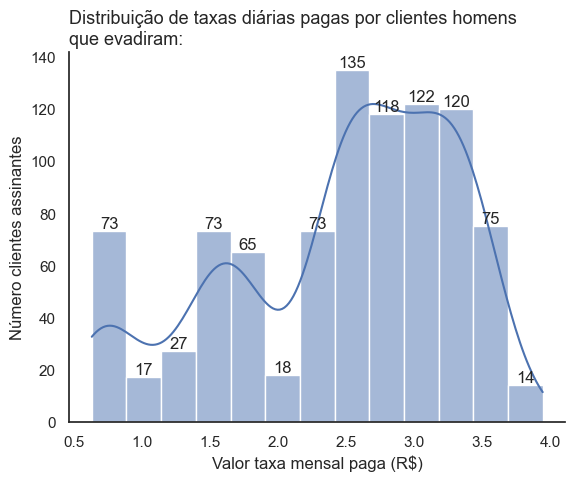

In [134]:
serie_contas_diarias_h_evasores = homens_evasores['contas_diarias']

hist_plot = sns.histplot(
    kde=True,
    data=serie_contas_diarias_h_evasores, 
    stat='count',
    #color='darkmagenta'
    )

plt.title('Distribuição de taxas diárias pagas por clientes homens' +
          '\nque evadiram:', loc='left', fontsize=13)
plt.ylabel('Número clientes assinantes')
plt.xlabel('Valor taxa mensal paga (R$)')
sns.despine()

for vl_barra in hist_plot.containers:
    hist_plot.bar_label(vl_barra)

In [91]:
homens_nao_evasores = \
df_info_binarias.query('gender=="Male" & churn==0')

homens_nao_evasores[['contas_diarias','charges_monthly','charges_total']].describe()

,contas_diarias,charges_monthly,charges_total
count,2619.000000,2619.000000,2619.000000
mean,2.031680,60.950401,2517.742402
std,1.031626,30.948793,2306.268502
min,0.608333,18.250000,18.800000
25%,0.833333,25.000000,565.075000
50%,2.146667,64.400000,1654.600000
75%,2.922500,87.675000,4195.850000
max,3.940000,118.200000,8594.400000


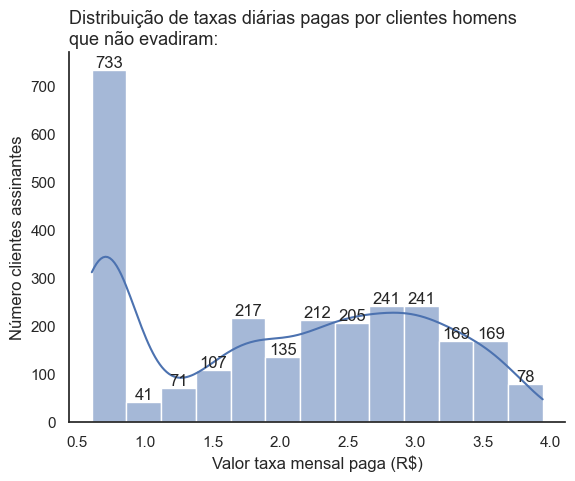

In [126]:
serie_contas_diarias_h_n_evasores = homens_nao_evasores['contas_diarias']

hist_plot = sns.histplot(
    kde=True,
    data=serie_contas_diarias_h_n_evasores, 
    stat='count')

plt.title('Distribuição de taxas diárias pagas por clientes homens' +
          '\nque não evadiram:', loc='left', fontsize=13)
plt.ylabel('Número clientes assinantes')
plt.xlabel('Valor taxa mensal paga (R$)')
sns.despine()

for vl_barra in hist_plot.containers:
    hist_plot.bar_label(vl_barra)

In [135]:
mulheres_evasoras = \
df_info_binarias.query('gender=="Female" & churn==1')

mulheres_evasoras[['contas_diarias','charges_monthly','charges_total']].describe()

,contas_diarias,charges_monthly,charges_total
count,939.000000,939.000000,939.000000
mean,2.493736,74.812087,1440.979499
std,0.805293,24.158783,1777.926268
min,0.633333,19.000000,19.100000
25%,2.104167,63.125000,143.750000
50%,2.655000,79.650000,663.050000
75%,3.125000,93.750000,2222.125000
max,3.915000,117.450000,8127.600000


In [142]:
mulheres_n_evasoras = \
df_info_binarias.query('gender=="Female" & churn==0')

mulheres_n_evasoras[['contas_diarias','charges_monthly','charges_total']].describe()

,contas_diarias,charges_monthly,charges_total
count,2544.000000,2544.000000,2544.000000
mean,2.055831,61.674941,2594.054422
std,1.041524,31.245731,2352.916112
min,0.613333,18.400000,18.850000
25%,0.840000,25.200000,599.287500
50%,2.150833,64.525000,1716.650000
75%,2.962083,88.862500,4301.250000
max,3.958333,118.750000,8672.450000


<Axes: xlabel='contas_diarias', ylabel='Count'>

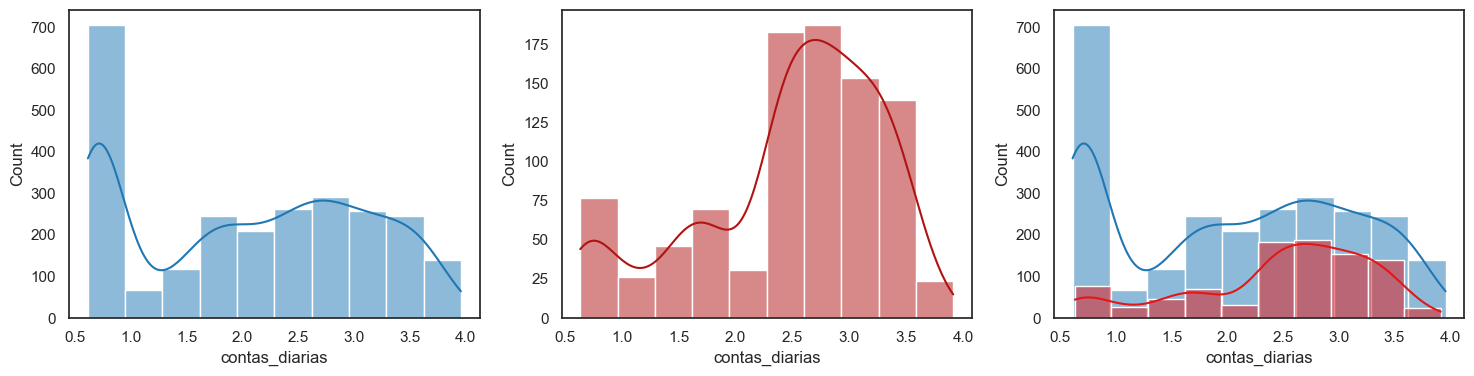

In [176]:
serie_contas_diarias_m_evasoras = mulheres_evasoras['contas_diarias']
serie_contas_diarias_m_n_evasoras = mulheres_n_evasoras['contas_diarias']


# hist_plot = sns.histplot(
#     kde=True,
#     data=serie_contas_diarias_h_evasores, 
#     stat='count',
#     #color='darkmagenta'
#     )

# plt.title('Distribuição de taxas diárias pagas por clientes homens' +
#           '\nque evadiram:', loc='left', fontsize=13)
# plt.ylabel('Número clientes assinantes')
# plt.xlabel('Valor taxa mensal paga (R$)')
# sns.despine()

# for vl_barra in hist_plot.containers:
#     hist_plot.bar_label(vl_barra)

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,4))

assembleHistogram(
    kde=True,
    data=serie_contas_diarias_m_n_evasoras, 
    stat='count',
    color='tab:blue',
    ax=ax1,
    bins=10,
    element='bars'
)

assembleHistogram(
    kde=True,
    data=serie_contas_diarias_m_evasoras, 
    stat='count',
    color="#B11212",
    ax=ax2,
    bins=10,
    element='bars'
)

assembleHistogram(
    kde=True,
    data=serie_contas_diarias_m_n_evasoras, 
    stat='count',
    color='tab:blue',
    ax=ax3,
    bins=10,
    element='bars'
)

assembleHistogram(
    kde=True,
    data=serie_contas_diarias_m_evasoras, 
    stat='count',
    color="#E41616",
    ax=ax3,
    bins=10,
    element='bars'
)


In [ ]:
# Ideia, fazer histograma contabilizando clientes os quais
# EVADIRAM (churn = 1), tendo essa pré-selecao feita,
# avaliar a distribuição de valores da TAXA MENSAL paga por eles.
# dps fazer essa mesma análise, mas com as taxas ANUAIS.

# Observar a mesma coisa, porém com clientes que NÃO evadiram!